<a href="https://colab.research.google.com/github/ggarci10/4961kaur/blob/main/Saya_ffnw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#from keras.wrappers.scikit_learn import KerasClassifier
from  sklearn.model_selection  import  GridSearchCV

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

import os
import sys
import pickle
!git clone https://github.com/ggarci10/4961kaur.git
%cd /content/4961kaur/

Cloning into '4961kaur'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 114 (delta 29), reused 3 (delta 3), pack-reused 66
Receiving objects: 100% (114/114), 1.68 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/4961kaur


In [19]:
dummy = 'DummyDatanew.csv'

df = pd.read_csv(dummy)

df.head()

,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month,BuildingType,SquareFootage,YearConstructed,ClimateRegion,NumberOfWorkers,Leak
0,0,6/1/23 0:08,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],Office,"250,000",2006,Very cold/Cold,256,No
1,1,6/1/23 3:24,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],Office,"250,000",2006,Very cold/Cold,256,No
2,2,6/1/23 8:04,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],Office,"250,000",2006,Very cold/Cold,256,No
3,3,6/1/23 8:10,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],Office,"250,000",2006,Very cold/Cold,256,No
4,4,6/1/23 8:23,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],Office,"250,000",2006,Very cold/Cold,256,No


In [11]:
#df['Leak'].fillna('LowCon', inplace=True)

In [12]:
#df.isnull().sum()

In [20]:
from datetime import datetime

current_year = 2023 #recommend to read the data's year
df.loc[:, 'BuildAge'] = current_year - df['YearConstructed']
df.drop('YearConstructed', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('gw', axis=1, inplace=True)
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Event_ID', axis=1, inplace=True)
df.drop('meterNumber', axis=1, inplace=True)

df['SquareFootage'] = df['SquareFootage'].str.replace(',', '').astype(int)

df.head()

,Duration,Volume,WaterClassify,EventFlowRate,BuildingType,SquareFootage,ClimateRegion,NumberOfWorkers,Leak,BuildAge
0,0.0,0.265625,LowCon,0.0,Office,250000,Very cold/Cold,256,No,17
1,0.0,1.851562,LowCon,0.0,Office,250000,Very cold/Cold,256,No,17
2,0.0,0.265625,LowCon,0.0,Office,250000,Very cold/Cold,256,No,17
3,0.0,0.000000,LowCon,0.0,Office,250000,Very cold/Cold,256,No,17
4,0.0,0.000000,LowCon,0.0,Office,250000,Very cold/Cold,256,No,17


In [22]:
encode = ['WaterClassify','BuildingType','ClimateRegion']

df = pd.get_dummies(df, columns=encode)

df.head()

,Duration,Volume,EventFlowRate,SquareFootage,NumberOfWorkers,Leak,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,BuildingType_Office,ClimateRegion_Very cold/Cold
0,0.0,0.265625,0.0,250000,256,No,17,False,True,False,False,True,True
1,0.0,1.851562,0.0,250000,256,No,17,False,True,False,False,True,True
2,0.0,0.265625,0.0,250000,256,No,17,False,True,False,False,True,True
3,0.0,0.000000,0.0,250000,256,No,17,False,True,False,False,True,True
4,0.0,0.000000,0.0,250000,256,No,17,False,True,False,False,True,True


In [24]:
# outliers ignored
feature_cols = ['Duration','Volume','EventFlowRate','SquareFootage',
                'NumberOfWorkers','BuildAge','WaterClassify_HighCon','WaterClassify_LowCon',
                'WaterClassify_MedCon','BuildingType_Office',
                'ClimateRegion_Very cold/Cold']

X = df[feature_cols]

X

,Duration,Volume,EventFlowRate,SquareFootage,NumberOfWorkers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,BuildingType_Office,ClimateRegion_Very cold/Cold
0,0.0,0.265625,0.0,250000,256,17,False,True,False,True,True
1,0.0,1.851562,0.0,250000,256,17,False,True,False,True,True
2,0.0,0.265625,0.0,250000,256,17,False,True,False,True,True
3,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True
4,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1031,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True
1032,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True
1033,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True
1034,0.0,0.000000,0.0,250000,256,17,False,True,False,True,True


In [25]:
y = df['Leak']

y

0       No
1       No
2       No
3       No
4       No
        ..
1031    No
1032    No
1033    No
1034    No
1035    No
Name: Leak, Length: 1036, dtype: object

In [26]:
leaks = df['Leak'].value_counts()
print(leaks)

Leak
No     807
Yes    229
Name: count, dtype: int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
counter_before = Counter(y_train)
print('Before balancing :', counter_before)


smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
counter_after = Counter(y_train)
print('After balancing:', counter_after)

Before balancing : Counter({'No': 642, 'Yes': 186})
After balancing: Counter({'No': 642, 'Yes': 642})


In [28]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam',
                                         alpha=1e-5, random_state=1,
                                         learning_rate_init = 0.6, max_iter=400)

# creat the grid, and define the metric for evaluating the model:
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 

0.5015503875968992
{'hidden_layer_sizes': (1, 4)}


In [29]:
my_ANN = MLPClassifier(hidden_layer_sizes=(1,1), activation= 'logistic',
                       solver='adam', alpha=1e-5, random_state=1,
                       learning_rate_init = 0.1, max_iter=400)

my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7932692307692307


In [30]:
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label='Yes')

print(fpr)
print("\n\n\n")
print(tpr)

[0. 1.]




[0. 1.]


In [32]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5


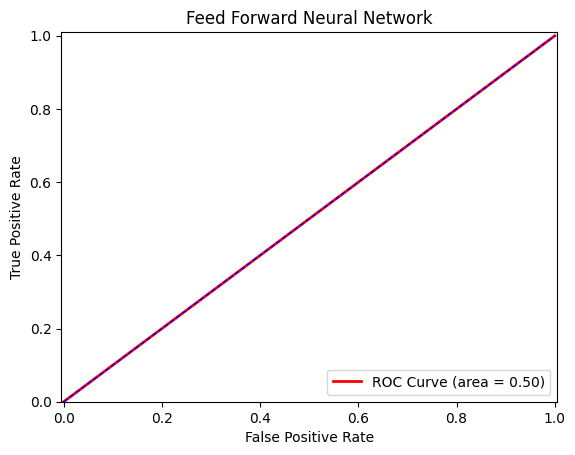

In [33]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2,
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feed Forward Neural Network')
plt.legend(loc="lower right")

plt.show()

In [34]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_ann

pd.set_option('display.max_rows', None)
print(results)

     actual prediction
782      No         No
536     Yes         No
287      No         No
251      No         No
920      No         No
735      No         No
223      No         No
437      No         No
71       No         No
66       No         No
617     Yes         No
957      No         No
391      No         No
213      No         No
158      No         No
463      No         No
267      No         No
521     Yes         No
859      No         No
988      No         No
837      No         No
659     Yes         No
814      No         No
199      No         No
773      No         No
832      No         No
402     Yes         No
593     Yes         No
860      No         No
996      No         No
511     Yes         No
193      No         No
513     Yes         No
639     Yes         No
452      No         No
519     Yes         No
273      No         No
322      No         No
209      No         No
68       No         No
577     Yes         No
67       No         No
644     Yes

In [ ]:
projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'Saya.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()


/content/4961kaur/projectname.pickle
